In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib in line


UsageError: Line magic function `%` not found.


In [5]:
titanic =pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bar graph to analyse number of people survived

<Axes: xlabel='Survived', ylabel='count'>

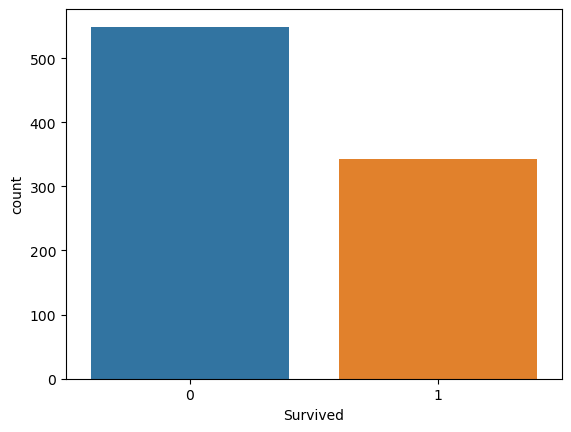

In [6]:
sns.countplot(x='Survived',data=titanic)

Analysis on gender aspect in the survived

<Axes: xlabel='Survived', ylabel='count'>

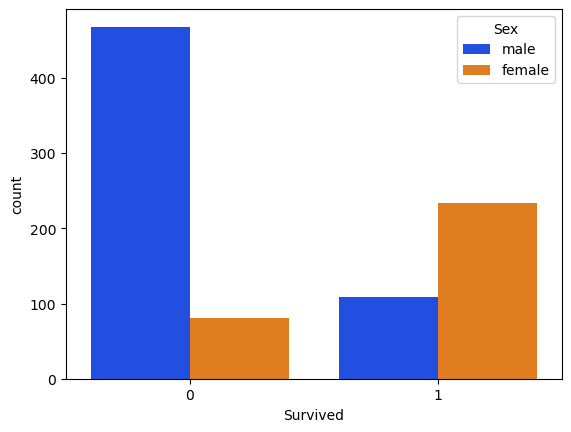

In [7]:
sns.countplot(x='Survived',data=titanic,hue='Sex',palette='bright')

Analysis on class of the passengers survived

<Axes: xlabel='Survived', ylabel='count'>

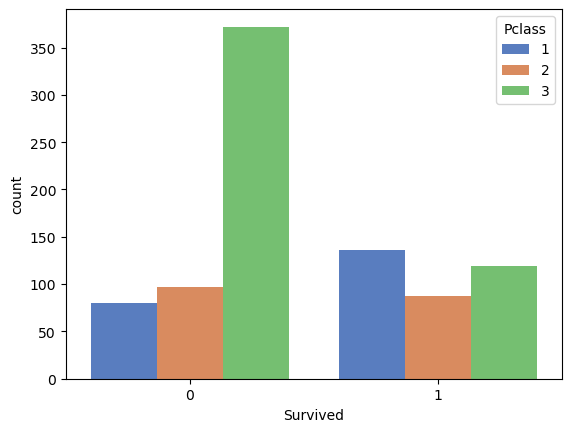

In [8]:
sns.countplot(x='Survived',data=titanic,hue='Pclass',palette='muted')

Histogram to plot passengers age

<Axes: ylabel='Frequency'>

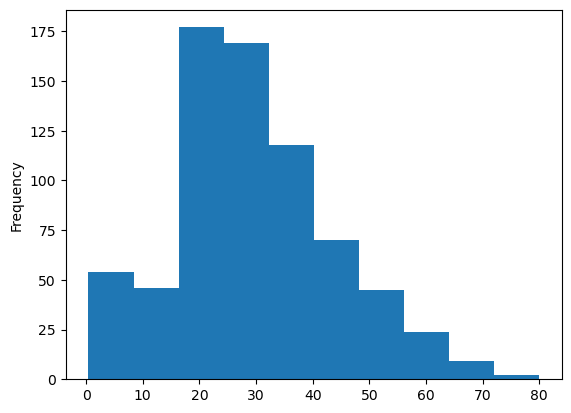

In [10]:
titanic['Age'].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

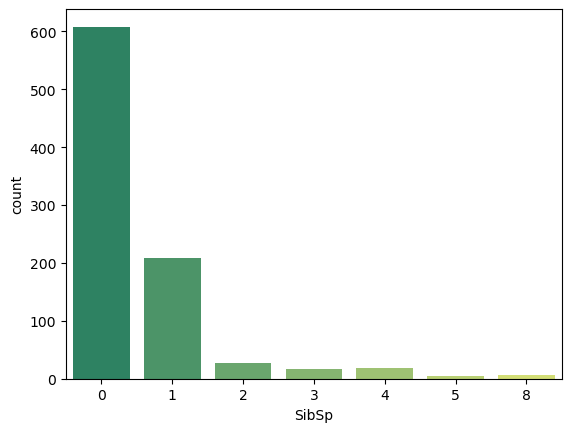

In [11]:
sns.countplot(x='SibSp',data=titanic,palette='summer')

<Axes: ylabel='Frequency'>

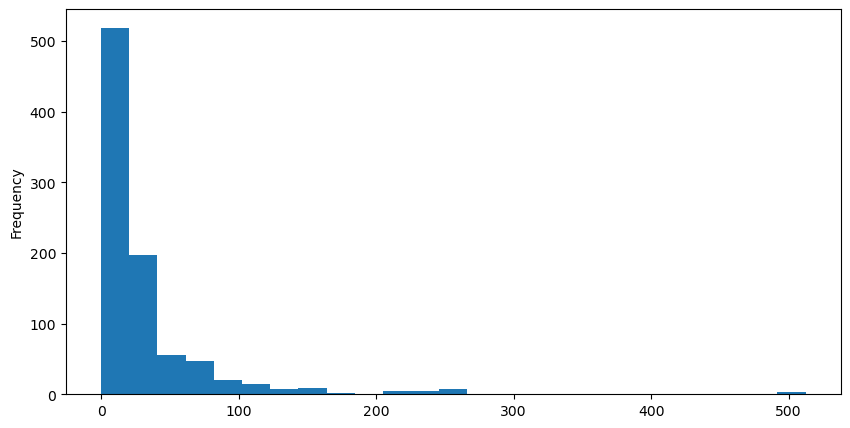

In [12]:
titanic['Fare'].plot.hist(bins=25,figsize=(10,5))

<Axes: xlabel='Parch', ylabel='count'>

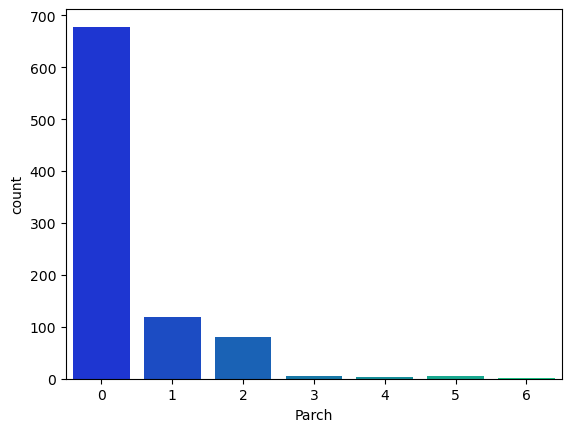

In [13]:
sns.countplot(x='Parch',data=titanic,palette='winter')

Heatmap showing the distribution of null values

<Axes: >

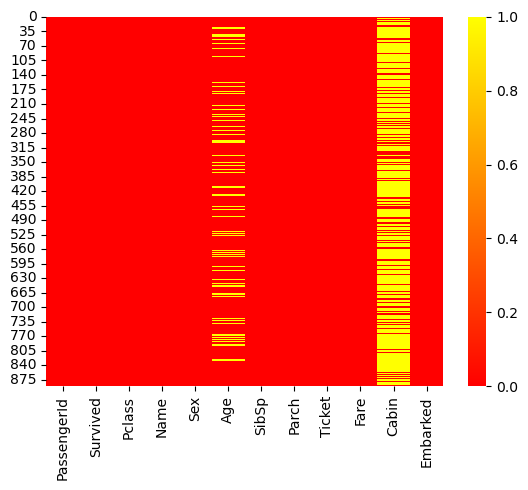

In [15]:
sns.heatmap(titanic.isnull(),cmap='autumn')

<Axes: xlabel='Pclass', ylabel='Age'>

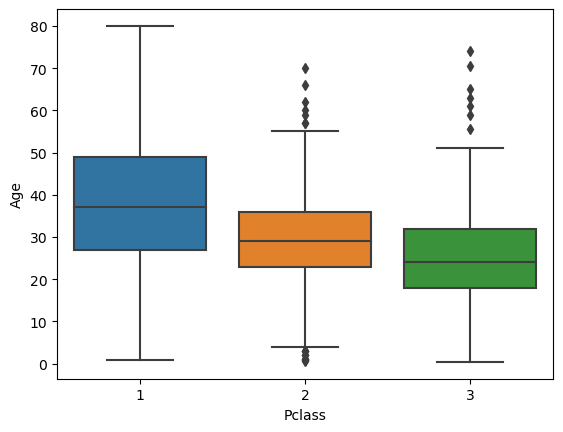

In [16]:
sns.boxplot(x='Pclass',y='Age',data=titanic)


Since cabin featurue has the most outliers it was removed

In [18]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

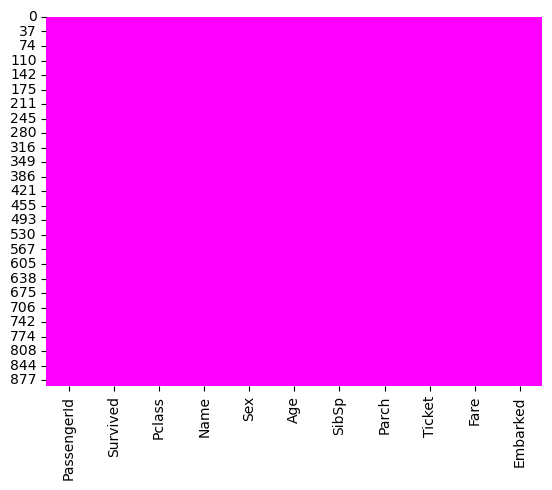

In [19]:
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(),cmap='spring',cbar=False)

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Changing the qualitative attributes to numerical data

In [22]:
pd.get_dummies(titanic['Sex'].head(3))
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


In [23]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [24]:
pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)
pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


Dropping the qualitative features after converting them to numerical form

In [25]:
titanic=pd.concat([titanic,sex,embark,pcl],axis=1)
titanic.drop(['Name','Sex','Pclass','Embarked','PassengerId','Ticket'],axis=1,inplace=True)
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


In [26]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

Dividing the dataset into tarining and testing dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=4)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [30]:
X_train=X_train.values
lr.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
X_test=X_test.values
predict=lr.predict(X_test)


In [32]:
from sklearn.metrics import classification_report
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85       132\n           1       0.79      0.67      0.72        82\n\n    accuracy                           0.80       214\n   macro avg       0.80      0.78      0.79       214\nweighted avg       0.80      0.80      0.80       214\n'

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[117,  15],
       [ 27,  55]], dtype=int64)

Accuracy of the model is evaluated

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.8037383177570093